In [3]:
# Import helpful libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the data, and separate the target
iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice

# Create X (After completing the exercise, you can return to modify this line!)
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# Select columns corresponding to features, and preview the data
X = home_data[features]
X.head()

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 21,857


In [10]:
esti = [25, 50, 100, 150, 200]
depth = [15, 18, 20, 25, 30]
featrue = [2, 3, 4, 5, 6]
samples = [2, 3, 4, 5, 6]
# result = np.zeros((625, 2), dtype = object)
result = []
for i in range(5):   
    for j in range(5):
        for k in range(5):
            for l in range(5):
                rf_model_on_full_data = RandomForestRegressor(
                    
                    n_estimators = esti[i],
                    max_depth = depth[j],
                    max_features = featrue[k],
                    min_samples_split = samples[l],
                    random_state=1)
                
                rf_model_on_full_data.fit(train_X, train_y)
                pred = rf_model_on_full_data.predict(val_X)
                mae = mean_absolute_error(pred, val_y)
                # params = f"{i,j,k,l}"
                # result[row, 0] = params
                # result[row, 1] = mae
                # row += 1
                result.append({
                    "n_estimators" : esti[i],
                    "max_depth" : depth[j],
                    "max_features" : featrue[k],
                    "min_samples_split" : samples[l],
                    "mae" : mae
                })
                

# best_params = result[result[:, 1].astype(float).argmin(), 0]
# best_mae = result[:, 1].astype(float).min()
# best_params, best_mae
result_frame = pd.DataFrame(result)
sort_result_frame = result_frame.sort_values(by = "mae")
sort_result_frame.head()

,n_estimators,max_depth,max_features,min_samples_split,mae
35,25,18,4,2,21610.587539
39,25,18,4,6,21617.263023
49,25,18,6,6,21680.078019
317,100,20,5,4,21686.870155
266,100,15,5,3,21703.897119


In [12]:
sort_result_frame.columns

Index(['n_estimators', 'max_depth', 'max_features', 'min_samples_split',
       'mae'],
      dtype='object')

In [28]:
sort_result_frame.mae = sort_result_frame["mae"].astype(float).round(0)
sort_result_frame

,n_estimators,max_depth,max_features,min_samples_split,mae
35,25,18,4,2,21611.0
39,25,18,4,6,21617.0
49,25,18,6,6,21680.0
317,100,20,5,4,21687.0
266,100,15,5,3,21704.0
...,...,...,...,...,...
78,25,25,2,5,23190.0
4,25,15,2,6,23199.0
29,25,18,2,6,23308.0
26,25,18,2,3,23435.0


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
maee = sort_result_frame[sort_result_frame.mae < 22000.0]
maee

,n_estimators,max_depth,max_features,min_samples_split,mae
35,25,18,4,2,21611.0
39,25,18,4,6,21617.0
49,25,18,6,6,21680.0
317,100,20,5,4,21687.0
266,100,15,5,3,21704.0
...,...,...,...,...,...
223,50,25,6,5,21995.0
320,100,20,6,2,21996.0
439,150,20,4,6,21997.0
141,50,15,5,3,21998.0


<Axes: xlabel='n_estimators', ylabel='mae'>

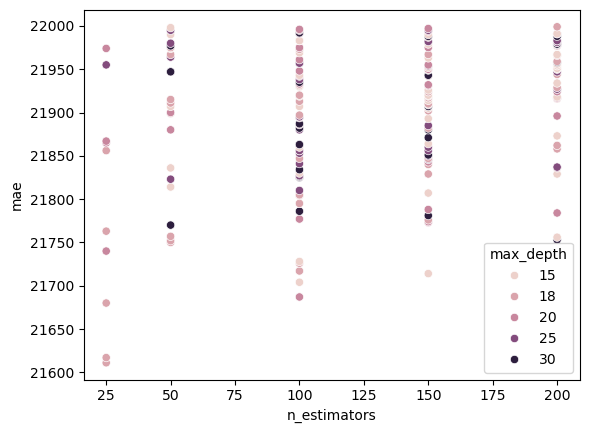

In [44]:
sns.scatterplot(x = 'n_estimators', y = 'mae', hue = 'max_depth' , data = maee)

<Axes: xlabel='n_estimators', ylabel='mae'>

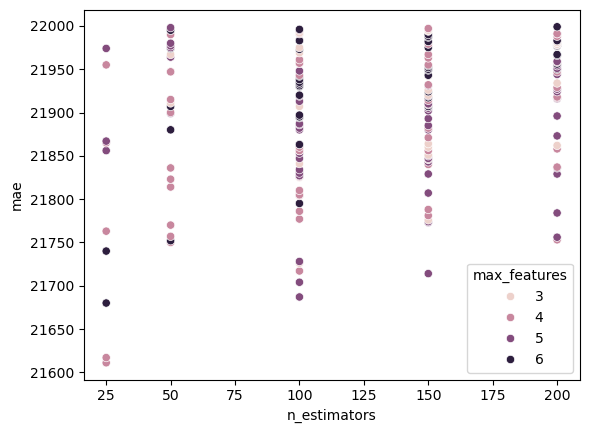

In [46]:
sns.scatterplot(x = 'n_estimators', y = 'mae', hue = 'max_features' , data = maee)

<Axes: xlabel='n_estimators', ylabel='mae'>

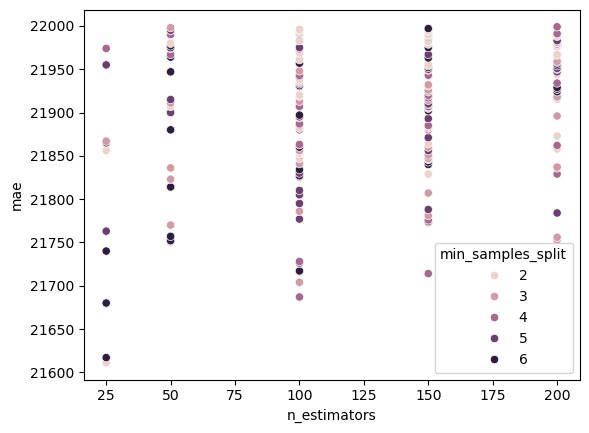

In [48]:
sns.scatterplot(x = 'n_estimators', y = 'mae', hue = 'min_samples_split' , data = maee)

<Axes: xlabel='max_depth', ylabel='mae'>

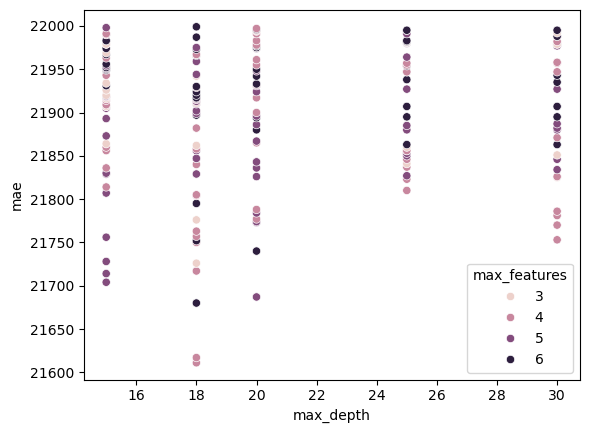

In [50]:
sns.scatterplot(x = 'max_depth', y = 'mae', hue = 'max_features' , data = maee)

<Axes: xlabel='max_depth', ylabel='mae'>

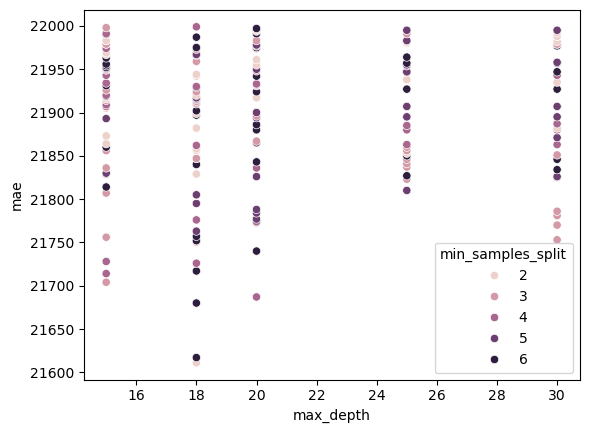

In [52]:
sns.scatterplot(x = 'max_depth', y = 'mae', hue = 'min_samples_split' , data = maee)

<Axes: xlabel='max_features', ylabel='mae'>

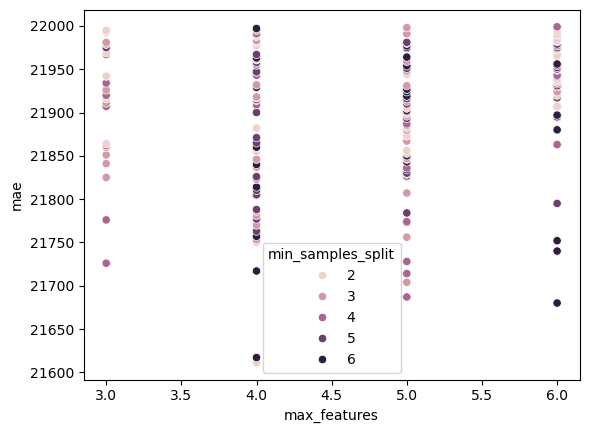

In [54]:
sns.scatterplot(x = 'max_features', y = 'mae', hue = 'min_samples_split' , data = maee)

In [58]:
esti = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
depth = [17,18,19,20]
featrue = [4, 5, 6]
samples = [2, 3, 4, 5, 6]
# result = np.zeros((625, 2), dtype = object)
result_2 = []
for i in range(16):   
    for j in range(4):
        for k in range(3):
            for l in range(5):
                rf_model_on_full_data = RandomForestRegressor(
                    
                    n_estimators = esti[i],
                    max_depth = depth[j],
                    max_features = featrue[k],
                    min_samples_split = samples[l],
                    random_state=1)
                
                rf_model_on_full_data.fit(train_X, train_y)
                pred = rf_model_on_full_data.predict(val_X)
                mae = mean_absolute_error(pred, val_y)
                result_2.append({
                    "n_estimators" : esti[i],
                    "max_depth" : depth[j],
                    "max_features" : featrue[k],
                    "min_samples_split" : samples[l],
                    "mae" : mae
                })
            

In [62]:
result_frame_2 = pd.DataFrame(result_2)
sort_result_frame_2 = result_frame_2.sort_values(by = "mae")
sort_result_frame_2.head()

,n_estimators,max_depth,max_features,min_samples_split,mae
195,13,18,4,2,21341.204632
555,19,18,4,2,21396.579034
615,20,18,4,2,21421.437824
495,18,18,4,2,21440.772917
255,14,18,4,2,21453.419705


In [72]:
sort_result_frame_2.mae = sort_result_frame_2["mae"].astype(float).round(0)
sort_result_frame_2

,n_estimators,max_depth,max_features,min_samples_split,mae
195,13,18,4,2,21341.0
555,19,18,4,2,21397.0
615,20,18,4,2,21421.0
495,18,18,4,2,21441.0
255,14,18,4,2,21453.0
...,...,...,...,...,...
185,13,17,5,2,23560.0
196,13,18,4,3,23586.0
125,12,17,5,2,23589.0
12,10,17,6,4,23687.0


In [76]:
esti = [12, 13, 14, 15, 16, 17, 18]
depth = [18, 19, 20, 21]
featrue = [3, 4, 5]             
samples = [2, 3, 4]
result_3 = []
for i in range(7):   
    for j in range(4):
        for k in range(3):
            for l in range(3):
                rf_model_on_full_data = RandomForestRegressor(
                    
                    n_estimators = esti[i],
                    max_depth = depth[j],
                    max_features = featrue[k],
                    min_samples_split = samples[l],
                    random_state=1)
                rf_model_on_full_data.fit(train_X, train_y)
                pred = rf_model_on_full_data.predict(val_X)
                mae = mean_absolute_error(pred, val_y)
                result_3.append({
                    "n_estimators" : esti[i],
                    "max_depth" : depth[j],
                    "max_features" : featrue[k],
                    "min_samples_split" : samples[l],
                    "mae" : mae
                })

In [78]:
result_frame_3 = pd.DataFrame(result_3)
sort_result_frame_3 = result_frame_3.sort_values(by = "mae")
sort_result_frame_3.head()

,n_estimators,max_depth,max_features,min_samples_split,mae
39,13,18,4,2,21341.204632
219,18,18,4,2,21440.772917
75,14,18,4,2,21453.419705
3,12,18,4,2,21507.388818
111,15,18,4,2,21519.867123


In [80]:
sort_result_frame_3.mae = sort_result_frame_3["mae"].astype(float).round(0)
sort_result_frame_3

,n_estimators,max_depth,max_features,min_samples_split,mae
39,13,18,4,2,21341.0
219,18,18,4,2,21441.0
75,14,18,4,2,21453.0
3,12,18,4,2,21507.0
111,15,18,4,2,21520.0
...,...,...,...,...,...
101,14,21,3,4,23551.0
40,13,18,4,3,23586.0
27,12,21,3,2,23611.0
65,13,21,3,4,23644.0


In [82]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [151]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
P = test_data[features]
P.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,11622,1961,896,0,1,2,5
1,14267,1958,1329,0,1,3,6
2,13830,1997,928,701,2,3,6
3,9978,1998,926,678,2,3,7
4,5005,1992,1280,0,2,2,5


In [153]:
P

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,11622,1961,896,0,1,2,5
1,14267,1958,1329,0,1,3,6
2,13830,1997,928,701,2,3,6
3,9978,1998,926,678,2,3,7
4,5005,1992,1280,0,2,2,5
...,...,...,...,...,...,...,...
1454,1936,1970,546,546,1,3,5
1455,1894,1970,546,546,1,3,6
1456,20000,1960,1224,0,1,4,7
1457,10441,1992,970,0,1,3,6


In [90]:
rf_model_on_full_data = RandomForestRegressor(n_estimators = 13, max_depth = 18, max_features = 4, min_samples_split = 2, random_state=1)
rf_model_on_full_data.fit(train_X, train_y)
pred = rf_model_on_full_data.predict(val_X)
mae = mean_absolute_error(pred, val_y)
print("Validation MAE for Random Forest Model: {:,.0f}".format(mae))

Validation MAE for Random Forest Model: 21,341


In [159]:
rf_model_on_full_data = RandomForestRegressor(n_estimators = 13, max_depth = 18, max_features = 4, min_samples_split = 2, random_state=1)
rf_model_on_full_data.fit(train_X, train_y)
pred = rf_model_on_full_data.predict(P)
pred

array([128286.53846154, 151592.30769231, 182833.46153846, ...,
       166512.61538462, 137169.23076923, 237923.07692308])

In [161]:
predicted = pd.DataFrame({
    "Id": test_data.Id,
    "SalePrice": pred
})
predicted

,Id,SalePrice
0,1461,128286.538462
1,1462,151592.307692
2,1463,182833.461538
3,1464,178391.758242
4,1465,186019.230769
...,...,...
1454,2915,78115.384615
1455,2916,78307.692308
1456,2917,166512.615385
1457,2918,137169.230769


In [169]:
predicted.to_csv('submission1.csv',  index=False)

In [5]:
submission = pd.read_csv("submission_ver1.csv")
submission

,Id,SalePrice
0,1461,128286.538462
1,1462,151592.307692
2,1463,182833.461538
3,1464,178391.758242
4,1465,186019.230769
...,...,...
1454,2915,78115.384615
1455,2916,78307.692308
1456,2917,166512.615385
1457,2918,137169.230769
